In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

import warnings
warnings.filterwarnings('ignore') 

In [69]:
data=pd.read_csv('loan_data (1).csv')

In [70]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Data Preprocessing

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [72]:
#Missing Values
data.isnull().sum().sort_values(ascending=False)

Credit_History       30
Self_Employed        21
Loan_Amount_Term     11
Dependents            8
Gender                5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
#Credit History
data['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [74]:
data['Credit_History'].fillna(1,inplace=True)

In [75]:
#Self Employed
data['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [76]:
data['Self_Employed'].fillna('No',inplace=True)

In [77]:
#Loan Amount Term
data['Loan_Amount_Term'].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
data['Loan_Amount_Term'].fillna(360,inplace=True)

In [79]:
# Dependents
data['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [80]:
data['Dependents'].fillna('0',inplace=True)

In [81]:
#Gender

In [82]:
data['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [83]:
data['Gender'].fillna('Male',inplace=True)

In [84]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
# Encoding
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [86]:
# DROP LoanID
del data['Loan_ID']

In [87]:
# Dependent 
data['Dependents'].replace('3+','3',inplace=True)

In [88]:
data['Dependents']=data['Dependents'].astype(int)

In [89]:
# Rest of the columns can be dummy encoded 
data=pd.get_dummies(data,drop_first=True,dtype=int)

In [90]:
data.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1


# Descision Tree

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,roc_curve,roc_auc_score 
from sklearn.model_selection import train_test_split

In [108]:
y=data['Loan_Status_Y']
x=data.drop(columns='Loan_Status_Y')

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,stratify=y,random_state=2)

In [111]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m=model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    prob =m.predict_proba(xtest)[:,1]
    
    print('confusion matrix:\n',confusion_matrix(ytest,pred))
    print('classification report\n',classification_report(ytest,pred))
    print('cohen kappa',cohen_kappa_score(ytest,pred))
    
    fpr,tpr,thresh = roc_curve(ytest,prob)
    plt.plot(fpr,tpr,color ='green')
    plt.plot([0,1],[0,1],color = 'red',ls='--')
    plt.title(f'AUC{roc_auc_score(ytest,prob)}')

confusion matrix:
 [[15 13]
 [ 4 64]]
classification report
               precision    recall  f1-score   support

           0       0.79      0.54      0.64        28
           1       0.83      0.94      0.88        68

    accuracy                           0.82        96
   macro avg       0.81      0.74      0.76        96
weighted avg       0.82      0.82      0.81        96

cohen kappa 0.5266821345707656


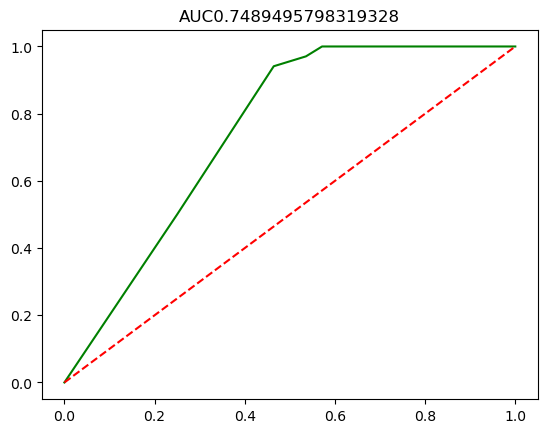

In [113]:
model_validation(DecisionTreeClassifier(max_depth=3),x_train,y_train,x_test,y_test)

# Bagging

# # # Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc=RandomForestClassifier(n_estimators=3)

In [97]:
rfc.fit(x,y)

RandomForestClassifier(n_estimators=3)

In [98]:
rfc[0]

DecisionTreeClassifier(max_features='sqrt', random_state=236714113)

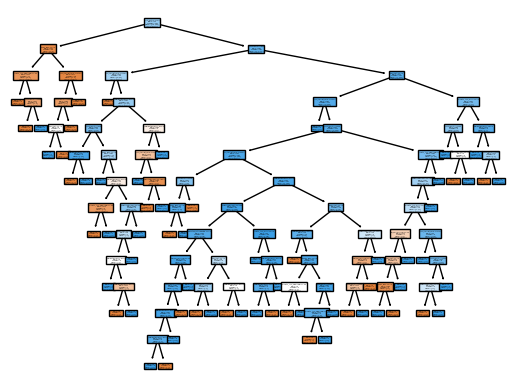

In [99]:
plot_tree(rfc[0],feature_names=x.columns,class_names = ['approved','rejected'],filled = True)
plt.show()

# Ensemble Learning

In [100]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB

confusion matrix:
 [[12 16]
 [ 6 62]]
classification report
               precision    recall  f1-score   support

           0       0.67      0.43      0.52        28
           1       0.79      0.91      0.85        68

    accuracy                           0.77        96
   macro avg       0.73      0.67      0.69        96
weighted avg       0.76      0.77      0.75        96

cohen kappa 0.3802816901408451


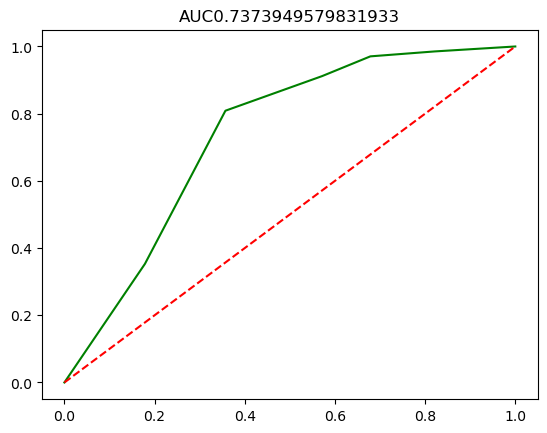

In [114]:
model_validation(RandomForestClassifier(n_estimators=5),x_train,y_train,x_test,y_test)

confusion matrix:
 [[12 16]
 [ 0 68]]
classification report
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        28
           1       0.81      1.00      0.89        68

    accuracy                           0.83        96
   macro avg       0.90      0.71      0.75        96
weighted avg       0.87      0.83      0.81        96

cohen kappa 0.5151515151515151


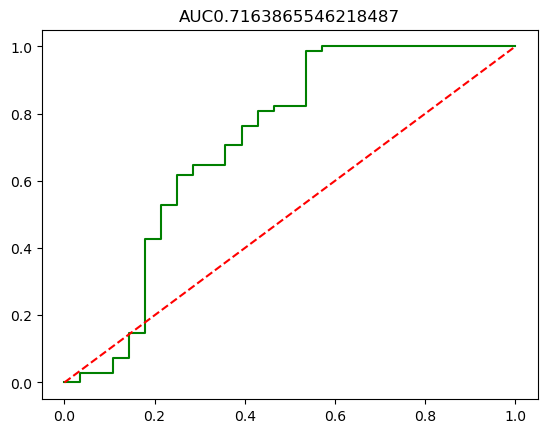

In [116]:
# Bagging (Naive Bayes)
model_validation(BaggingClassifier(estimator=GaussianNB(),n_estimators=5,max_samples=x_train.shape[0]),x_train,y_train,x_test,y_test)

In [103]:
m.estimators_samples_

[array([229, 190, 106, 288, 282, 265, 354,  82,  49, 360, 196, 313, 215,
         59, 173, 106, 220, 130,   1,  82,  81, 277,  78, 190, 234, 234,
         61, 302, 118,  97,   4,  98, 309, 224,  28, 374, 244, 157, 105,
        277, 108, 143,  82,  10, 368, 270, 331,  48, 222, 144, 188,  63,
         94,  34,  12, 288,  87, 137, 375,  42, 186, 220,  41, 376, 164,
        127, 194, 140, 224, 314, 132, 265,  25,  22, 290, 102, 341,  85,
        377, 277, 378, 368, 153, 117,   8,  32, 244,  83,  53,  44, 360,
        319, 124,  76, 251, 311, 343, 320, 320, 346,  74, 143, 338,  23,
        158,  63, 337, 196, 262,  82, 228,  66, 277, 258, 273,  84,  33,
        139, 180, 110,  38, 295, 294,  49, 192, 156, 163, 252, 204,  62,
        378, 129, 190, 137, 280, 245,   2,  95, 348, 113, 281, 127,  15,
        361, 362,  22, 187, 130, 160, 373, 100, 218, 187,  70, 251, 159,
        326,   6, 231,  64, 301, 109, 362, 327, 111, 278,  73, 283,  82,
        303,  94,  15,  64, 260, 173, 325, 302,  17

### Ada Boost

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1)

confusion matrix:
 [[14 14]
 [ 8 60]]
classification report
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        28
           1       0.81      0.88      0.85        68

    accuracy                           0.77        96
   macro avg       0.72      0.69      0.70        96
weighted avg       0.76      0.77      0.76        96

cohen kappa 0.4080717488789237


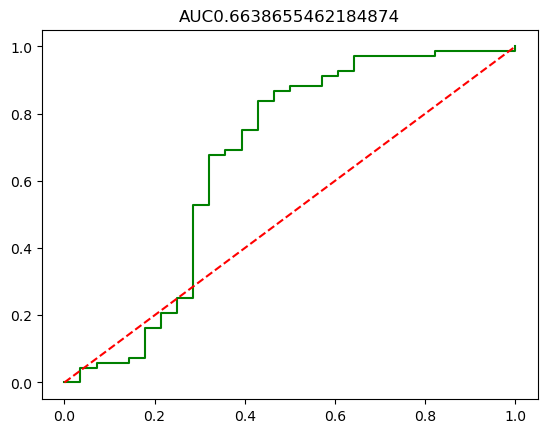

In [120]:
model_validation(ada,x_train,y_train,x_test,y_test)

### Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05)

confusion matrix:
 [[14 14]
 [ 5 63]]
classification report
               precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.82      0.93      0.87        68

    accuracy                           0.80        96
   macro avg       0.78      0.71      0.73        96
weighted avg       0.79      0.80      0.79        96

cohen kappa 0.4709976798143851


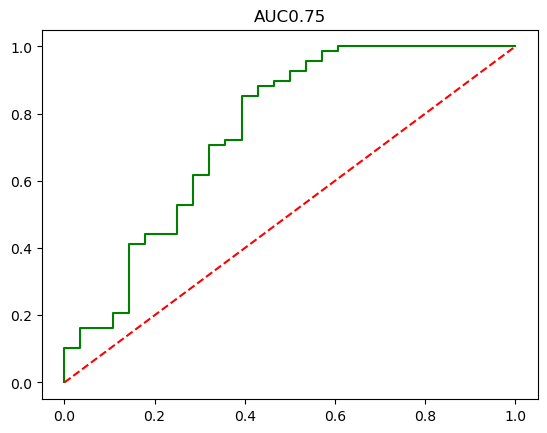

In [128]:
model_validation(gbc,x_train,y_train,x_test,y_test)

In [130]:
### Lets use GridSearchCV to tune the model
from sklearn.model_selection import GridSearchCV

In [131]:
param={'n_estimators':[50,70,100,120,150,180,200],
      'learning_rate':[1,0.5,0.1,0.05],
      'max_depth':[4,6,8,10,12]}

In [132]:
gscv=GridSearchCV(estimator=GradientBoostingClassifier(),
                param_grid=param,cv=3,scoring='f1_macro',verbose=3)

In [133]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.674 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.799 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.721 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.703 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.788 total time=   0.1s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=70;, score=0.699 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.656 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.810 total time=   0.2s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.709 total time=   0.2s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=120;, score=0.693 total time=   0.1s
[CV 2/3] END 

[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=70;, score=0.737 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.719 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.696 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=100;, score=0.737 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.701 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.677 total time=   0.1s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=120;, score=0.737 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.719 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.706 total time=   0.1s
[CV 3/3] END learning_rate=1, max_depth=12, n_estimators=150;, score=0.727 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=12, n_estimators=180;

[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.752 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.719 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.687 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=120;, score=0.742 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.684 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.687 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=150;, score=0.742 total time=   0.5s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.703 total time=   0.4s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.696 total time=   0.3s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=180;, score=0.742 total time=   0.4s
[CV 1/3] END learning_rate=0.5, max_dept

[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=120;, score=0.725 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.711 total time=   0.8s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.749 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.767 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.692 total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.766 total time=   1.0s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=180;, score=0.767 total time=   1.0s
[CV 1/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.725 total time=   0.9s
[CV 2/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.777 total time=   1.1s
[CV 3/3] END learning_rate=0.1, max_depth=8, n_estimators=200;, score=0.741 total time=   1.1s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_es

[CV 2/3] END learning_rate=0.05, max_depth=6, n_estimators=150;, score=0.771 total time=   0.4s
[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=150;, score=0.766 total time=   0.5s
[CV 1/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.731 total time=   0.5s
[CV 2/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.771 total time=   0.6s
[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=180;, score=0.745 total time=   0.6s
[CV 1/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.713 total time=   0.6s
[CV 2/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.760 total time=   0.6s
[CV 3/3] END learning_rate=0.05, max_depth=6, n_estimators=200;, score=0.762 total time=   0.6s
[CV 1/3] END learning_rate=0.05, max_depth=8, n_estimators=50;, score=0.694 total time=   0.2s
[CV 2/3] END learning_rate=0.05, max_depth=8, n_estimators=50;, score=0.706 total time=   0.2s
[CV 3/3] END learning_rate=0.05, max_depth

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.05],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 70, 100, 120, 150, 180, 200]},
             scoring='f1_macro', verbose=3)

In [134]:
gscv.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 70}

In [136]:
gscv.best_score_

0.7667168682253506

confusion matrix:
 [[14 14]
 [ 7 61]]
classification report
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.81      0.90      0.85        68

    accuracy                           0.78        96
   macro avg       0.74      0.70      0.71        96
weighted avg       0.77      0.78      0.77        96

cohen kappa 0.4285714285714286


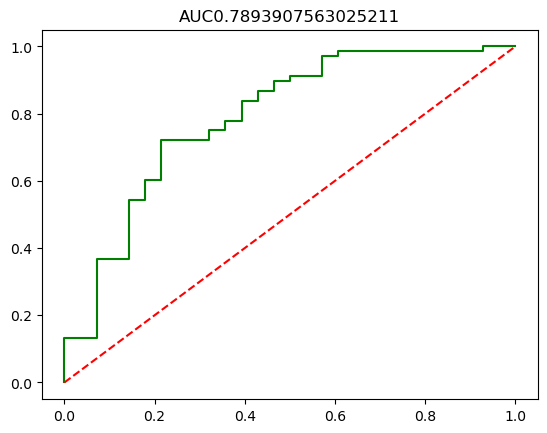

In [137]:
model_validation(GradientBoostingClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)